<a href="https://colab.research.google.com/github/konapalask/NLP_Projects/blob/main/COVID_19_Tweet_Sentiment_Analysis_using_TF_IDF_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:


import os
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')   # required in latest NLTK versions
nltk.download('wordnet')



# Load dataset
data = pd.read_csv("/content/Corona_NLP_train.csv", encoding="latin1")
print("Dataset shape:", data.shape)
print(data.head())


sample_corpus = data["OriginalTweet"].dropna().sample(500, random_state=42).tolist()



Dataset shape: (41157, 6)
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
data = pd.read_csv("/content/Corona_NLP_train.csv", encoding="latin1")
print("Dataset shape:", data.shape)
print(data.head())


sample_corpus = data["OriginalTweet"].dropna().sample(500, random_state=42).tolist()

Dataset shape: (41157, 6)
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  


In [9]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()  # Lowercase
    text = ''.join(ch for ch in text if ch not in string.punctuation and (ch.isalpha() or ch.isspace()))  # Remove punctuation, numbers
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return words

processed_corpus = [preprocess(doc) for doc in sample_corpus]

In [10]:
all_words = [word for doc in processed_corpus for word in doc]
total_words = len(all_words)
unique_words = set(all_words)
vocab_size = len(unique_words)

print(f"\nTotal words: {total_words}")
print(f"Vocabulary size: {vocab_size}")


Total words: 9259
Vocabulary size: 3742


In [11]:
vocab_list = list(unique_words)
word2idx = {word: i for i, word in enumerate(vocab_list)}

example_sentence = processed_corpus[0]
one_hot_vectors = []
for word in example_sentence:
    vec = [0] * vocab_size
    vec[word2idx[word]] = 1
    one_hot_vectors.append(vec)

print(f"\nOne-hot vectors for example sentence: {' '.join(example_sentence)}")
for word, vec in zip(example_sentence, one_hot_vectors):
    print(f"{word}: {vec}")


One-hot vectors for example sentence: without would problem whatsoever people getting worried supply chain price key food staple starting soar part world via
without: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 


Top 20 Frequent Words (Bag of Words):
covid: 263
coronavirus: 223
store: 107
price: 104
grocery: 90
food: 86
supermarket: 86
people: 71
consumer: 64
amp: 47
worker: 47
hand: 44
get: 41
time: 41
online: 40
shopping: 40
u: 39
pandemic: 39
home: 37
go: 37


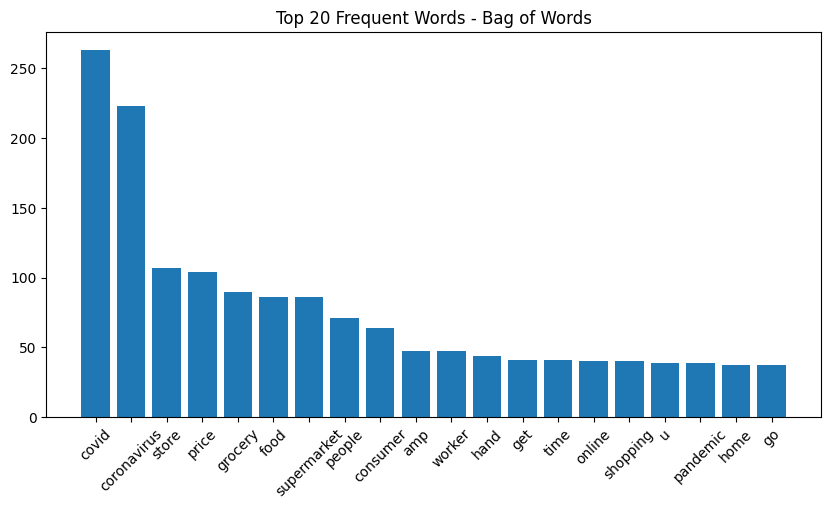

In [12]:
bow_freq = Counter(all_words)
top_20 = bow_freq.most_common(20)
print("\nTop 20 Frequent Words (Bag of Words):")
for word, count in top_20:
    print(f"{word}: {count}")

# Visualize top words
words, counts = zip(*top_20)
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Frequent Words - Bag of Words")
plt.show()


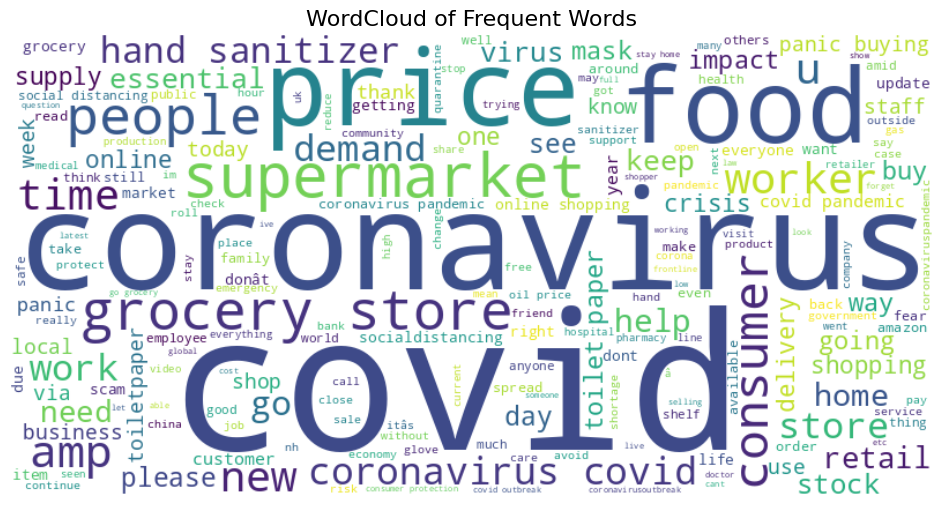

In [13]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Frequent Words", fontsize=16)
plt.show()

In [14]:
bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

print(f"\nVocabulary sizes by n-gram:")
print(f"Unigram: {len(unique_words)}")
print(f"Bigram: {len(set(bigrams))}")
print(f"Trigram: {len(set(trigrams))}")


Vocabulary sizes by n-gram:
Unigram: 3742
Bigram: 8539
Trigram: 9186


In [15]:
processed_corpus_joined = [' '.join(doc) for doc in processed_corpus]
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_corpus_joined)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)

# Top 20 words by TF-IDF scores
tfidf_top_indices = tfidf_scores.argsort()[::-1][:20]
print("\nTop 20 words by TF-IDF scores:")
for idx in tfidf_top_indices:
    print(f"{tfidf_feature_names[idx]}: {tfidf_scores[idx]:.4f}")


Top 20 words by TF-IDF scores:
covid: 20.3512
coronavirus: 18.9745
store: 12.7705
price: 12.0303
grocery: 11.4736
supermarket: 10.9946
food: 10.8199
consumer: 9.1691
people: 8.9792
worker: 7.1075
pandemic: 6.4905
shopping: 6.4884
online: 6.4844
get: 6.4604
go: 6.4587
hand: 6.3316
time: 6.2974
amp: 6.2091
panic: 5.4320
home: 5.3380
